# House Price Predictions Project

# TBA TEAM <br><br><br>
<font size="4">
    
- Bilal Yussef.<br><br><br>
- Talal Al-Mutairi.<br><br><br>
- Abdulrahman Al-Salamah.<br><br><br>
</font>

## Kaggle Kernal Link
https://www.kaggle.com/bilalyussef/tba-team-dsi-v?scriptVersionId=22933796

## Problem Statment

<div class="alert alert-block alert-success">
    
   For most citizens around the globe, buying a house is a lifetime project that affects their lifes from that point onward. Despite the crucial importance of this task, there aren't many predictive models to assess the price of a house given its features.<br>
    
   The aim of this project is **to devolope a predictive model to estimate the price of a house in Ames, Iowa in the United States**, Based on data and features giving about the house.<br>
    
   Through this project, different models will be implemented for the sake of sale price prediction. We'll start with the **simple Linear regression** then we will use **regulerization techniques** to help reduce the expected overfitting of the simple linear regression. will use **Lasso, Ridge and Elastic Net** teqniques, with and without CV (cross validation) to penelize the overfitted features. We'll be using also other advanced Regression teqniques such as **Random Forest Regressor, Support Vector Machine (SVM) regressor and the K Nearest Neighbor Regressor.** Inaddition, the Grid Search teqnique will be used to optimize the parameters in the models.
   
   At the End of this project, the model with the highest score will be chosen. The success of the project will be based on scoring at least 0.9 in the test split of the data.<br>
   
   A model with at least 90% accuracy would be beneficial for both people working in the houses sales sector and ordinary people who wants to buy new house.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split,KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',300)

In [3]:
hp = pd.read_csv('./train.csv')
hp_test = pd.read_csv('./test.csv')

In [4]:
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
hp_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
hp.shape,hp_test.shape

((1460, 81), (1459, 80))

<div class="alert alert-block alert-info">
    
   we have **1460 rows** and **81 columns** in the **training dataset**.<br>
   we have **1459 rows** and **80 columns** in the **testing dataset**.

In [7]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
hp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

<div class="alert alert-block alert-info">
    
   ### Training Dataset
   we have **3 columns** with **float64** data type.<br>
   we have **35 columns** with **int64** data type.<br>
   we have **43 columns** with **object** data type.<br>
   Total = **81** column

<div class="alert alert-block alert-info">
    
   ### Training Dataset
   we have **11 columns** with **float64** data type.<br>
   we have **23 columns** with **int64** data type.<br>
   we have **46 columns** with **object** data type.<br>
    Total = **80** column

## Percentage of Missing Values.

In [9]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    if df.isnull().sum().sum() != 0:
        total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
        percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
        return pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    else:
        print (f'Congrats, No null values in your dataframe')

In [10]:
missing_percentage(hp)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [11]:
missing_percentage(hp_test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


## Visualizing the missing data

Text(0.5, 1, 'Test Data')

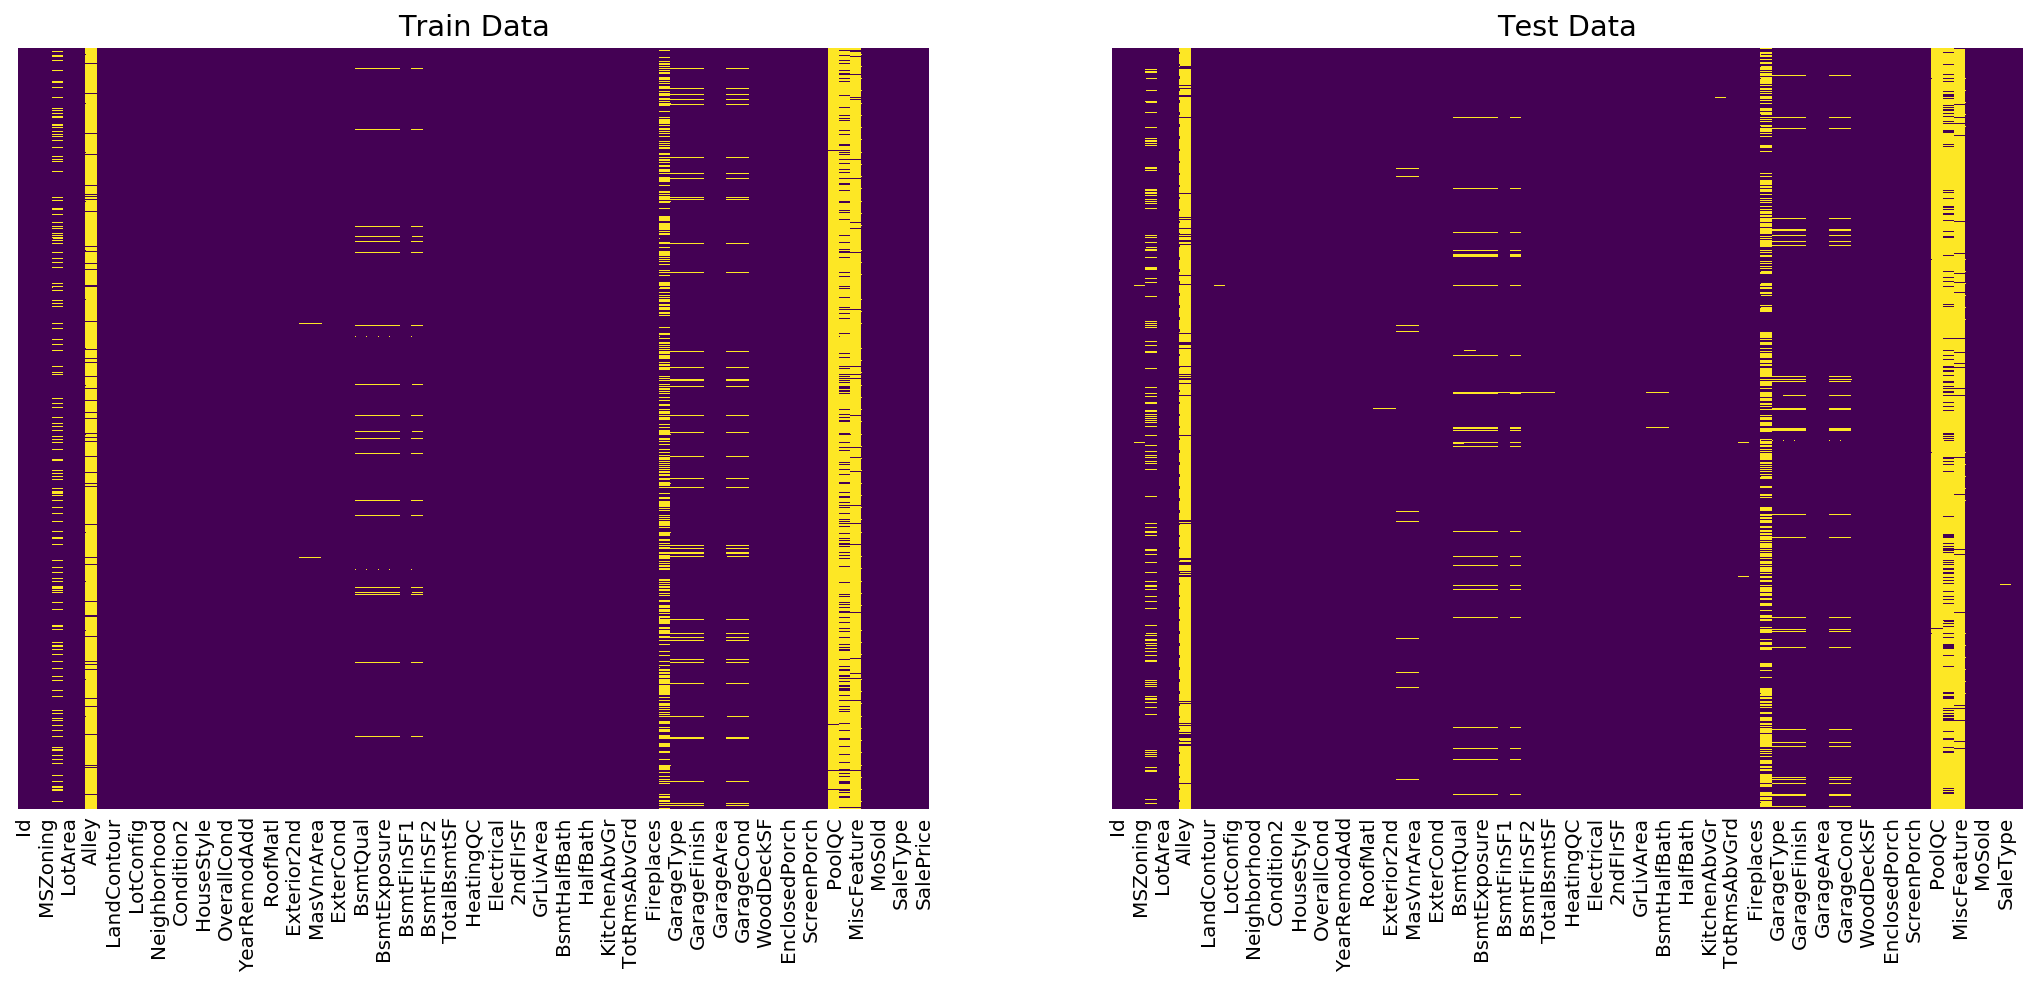

In [12]:
f,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
f.set_figheight(7)
f.set_figwidth(16)
sns.heatmap(hp.isnull(),ax=ax1,cbar=False, yticklabels=False,cmap='viridis')
sns.heatmap(hp_test.isnull(),ax=ax2,cbar=False, yticklabels=False,cmap='viridis')
ax1.set_title('Train Data')
ax2.set_title('Test Data')

## Obsevations

<div class="alert alert-block alert-danger">
   
   - Many columns has NaN values.<br><br>
   - Refering to the data description, it was found that the NaN values in many columns are not actually missing data. Rather they are NaNs either because the feature is not applicable **(i.e. BsmtQual includeds NaN values because some houses do not have basements. Consequently, it a value for basement quality can not be reported).**<br><br>
   - The features like (BsmtQual) were searched, investegated and then a list of all such columns were saved in a list named **nnan_col** (Not NaN columns) .<br><br>
   - also it was found that 3 catogrical variables were assigned a numercal values (ratings variables), and thus it was found as either float64 or int64. These columns were saved in a list named c_columns (catogrical columns).

In [13]:
nnan_col = ["BsmtQual",'BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','GarageQual','GarageFinish','GarageType',
            'GarageCond','FireplaceQu','Fence','Alley','MiscFeature','PoolQC']

In [14]:
def fill_fun(df,columns_list):
    for col in columns_list:
        df[col].fillna(value='NA',inplace = True)

In [15]:
fill_fun(hp,nnan_col)
fill_fun(hp_test,nnan_col)

In [16]:
def fill_missing(df):
    for col in df.columns:
        if df[col].dtypes == 'O':
            df[col].fillna(value=df[col].mode(dropna=True)[0],inplace=True)
        else:
            df[col].fillna(value=df[col].median(),inplace=True)


In [17]:
fill_missing(hp)
fill_missing(hp_test)

In [18]:
hp.GarageYrBlt = hp.GarageYrBlt.fillna(value=0.0)
hp_test.GarageYrBlt = hp_test.GarageYrBlt.fillna(value=0.0)

<div class="alert alert-block alert-warning">

#### **Note: Houses that has no garages are assigned a zero value in the GarageYrBlt column

In [19]:
missing_percentage(hp)

Congrats, No null values in your dataframe


In [20]:
missing_percentage(hp_test)

Congrats, No null values in your dataframe


## Type changing

In [21]:
# c_columns = ['MSSubClass', 'OverallQual' , 'OverallCond' ]

In [22]:
# def change_columns(df):
#     column_wrong_type = c_columns
#     for col in column_wrong_type:
#         df[col]=df[col].astype(str)

In [23]:
# change_columns(hp)
# change_columns(hp_test)

<div class="alert alert-block alert-success">
    
   ### Now that we have no missing values, we can start investigating our data.
   - We'll start with the Target Feature **(SalePrice)**

In [24]:
def plotting_3_chart(df, feature):

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    

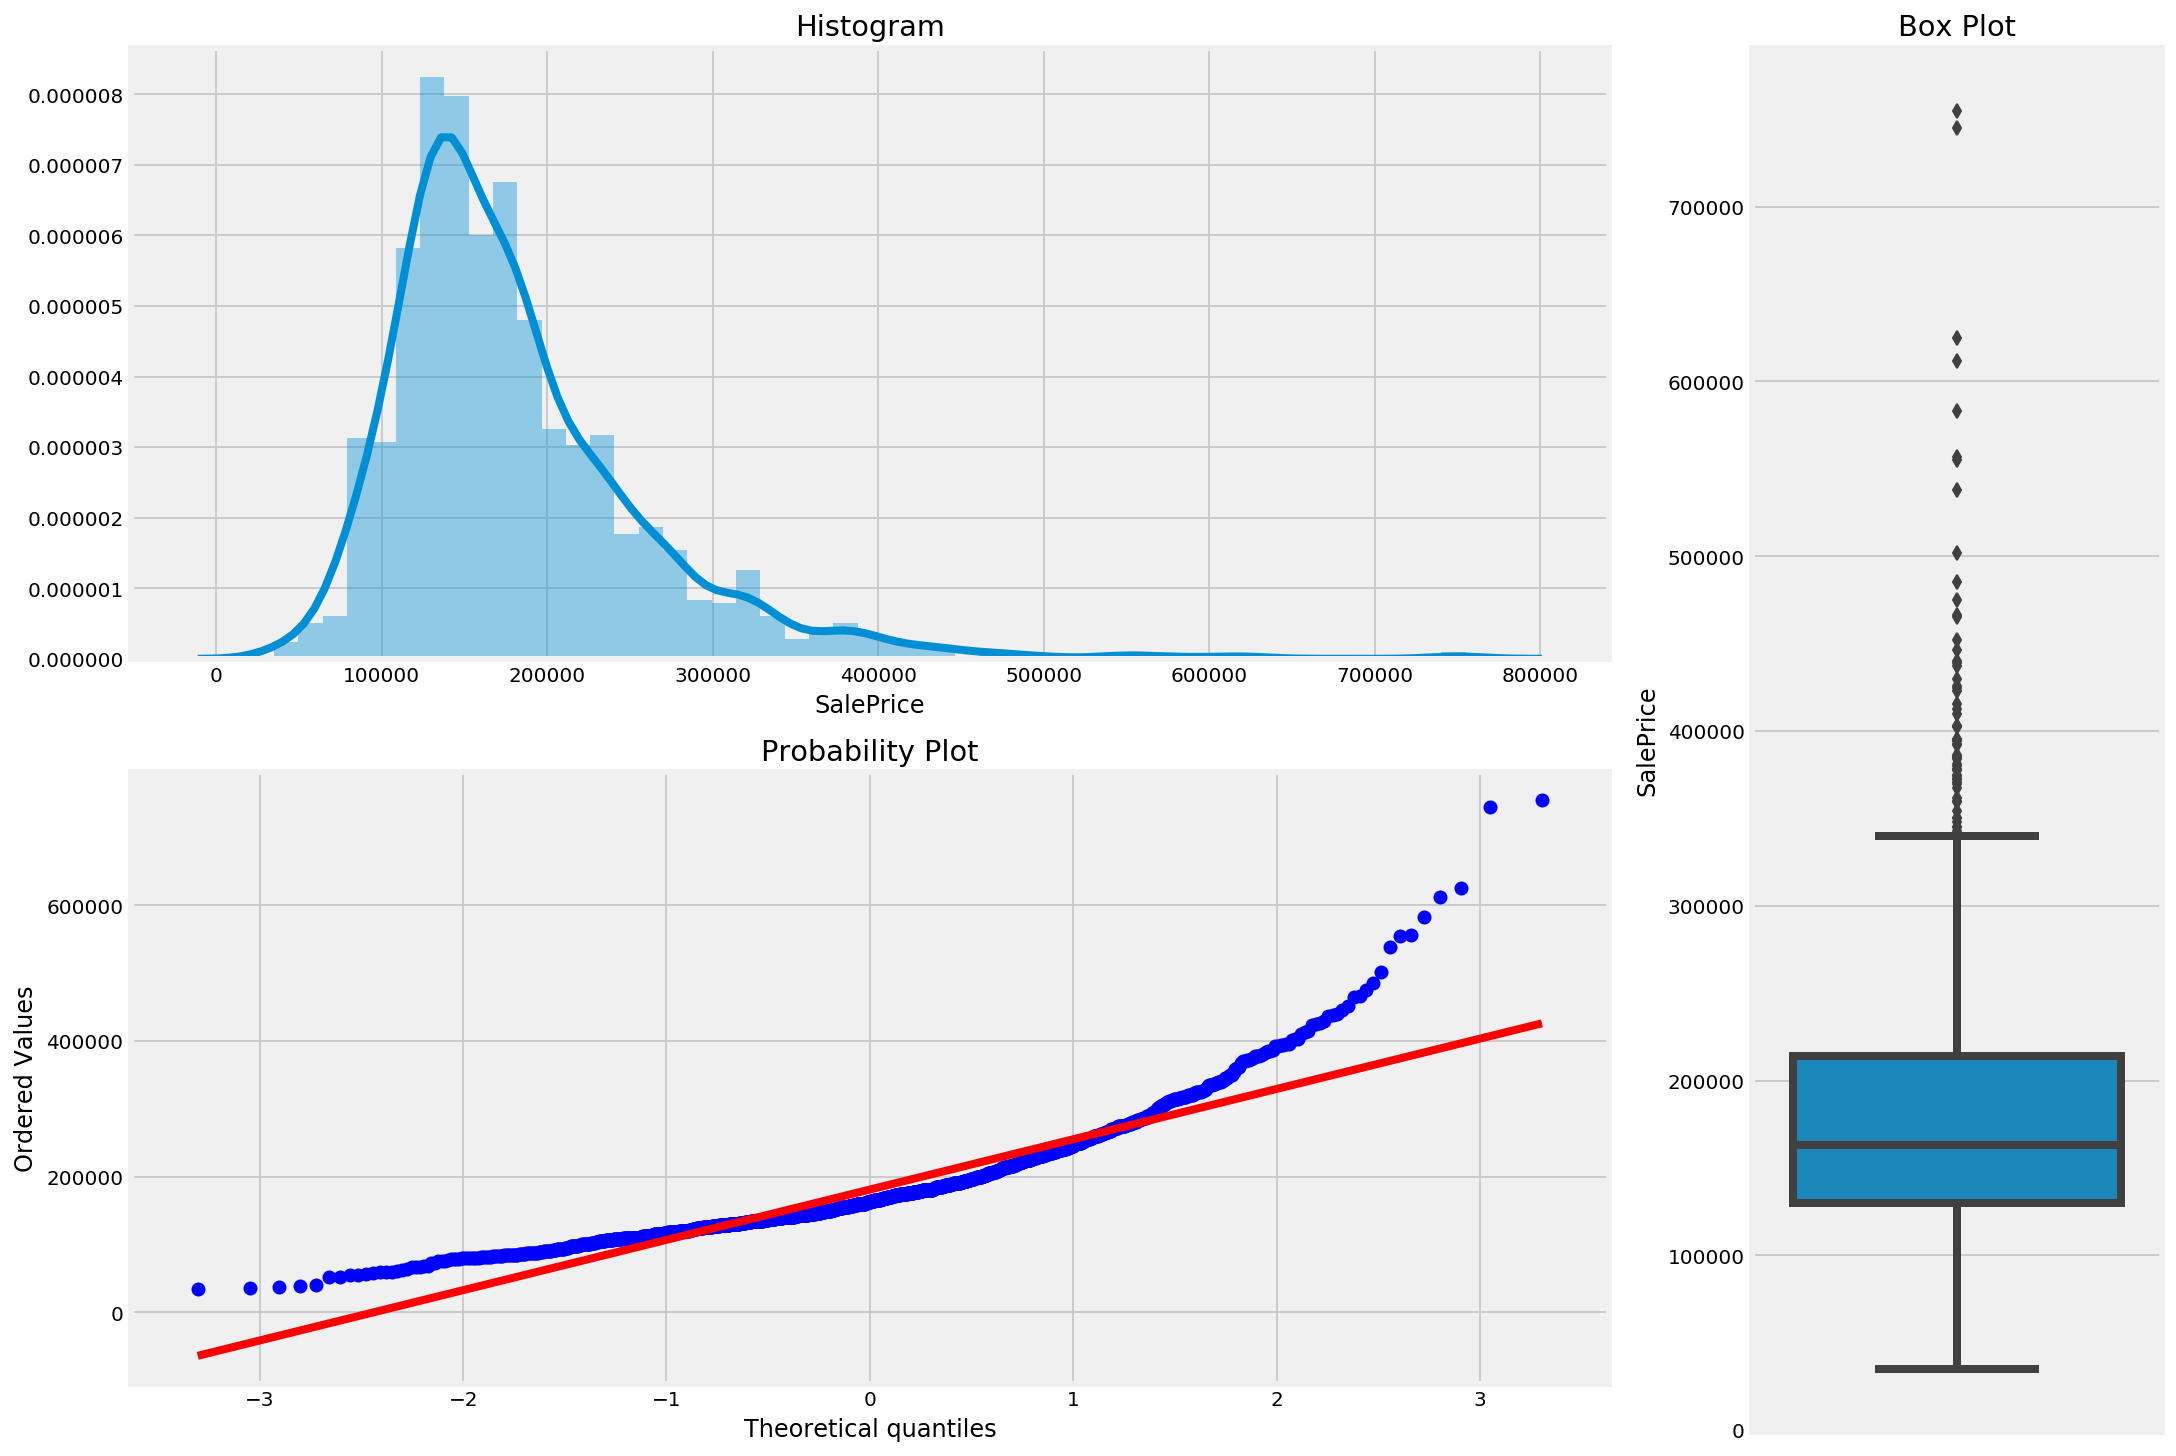

In [25]:
plotting_3_chart(hp, 'SalePrice')

In [26]:
stats.kurtosis(hp.SalePrice)

6.509812011089439

<div class="alert alert-block alert-info">
    
  #### We can coclude the following from the above graphs.
  - We have got many outliers in the target variable.
  - We can see also that the Sale Price is not normally distibuted (referring to the Q-Q plot above). The Sale Price data is skewed to the right, we can see also the value of the kurtosis that indicates heavy tailed data.

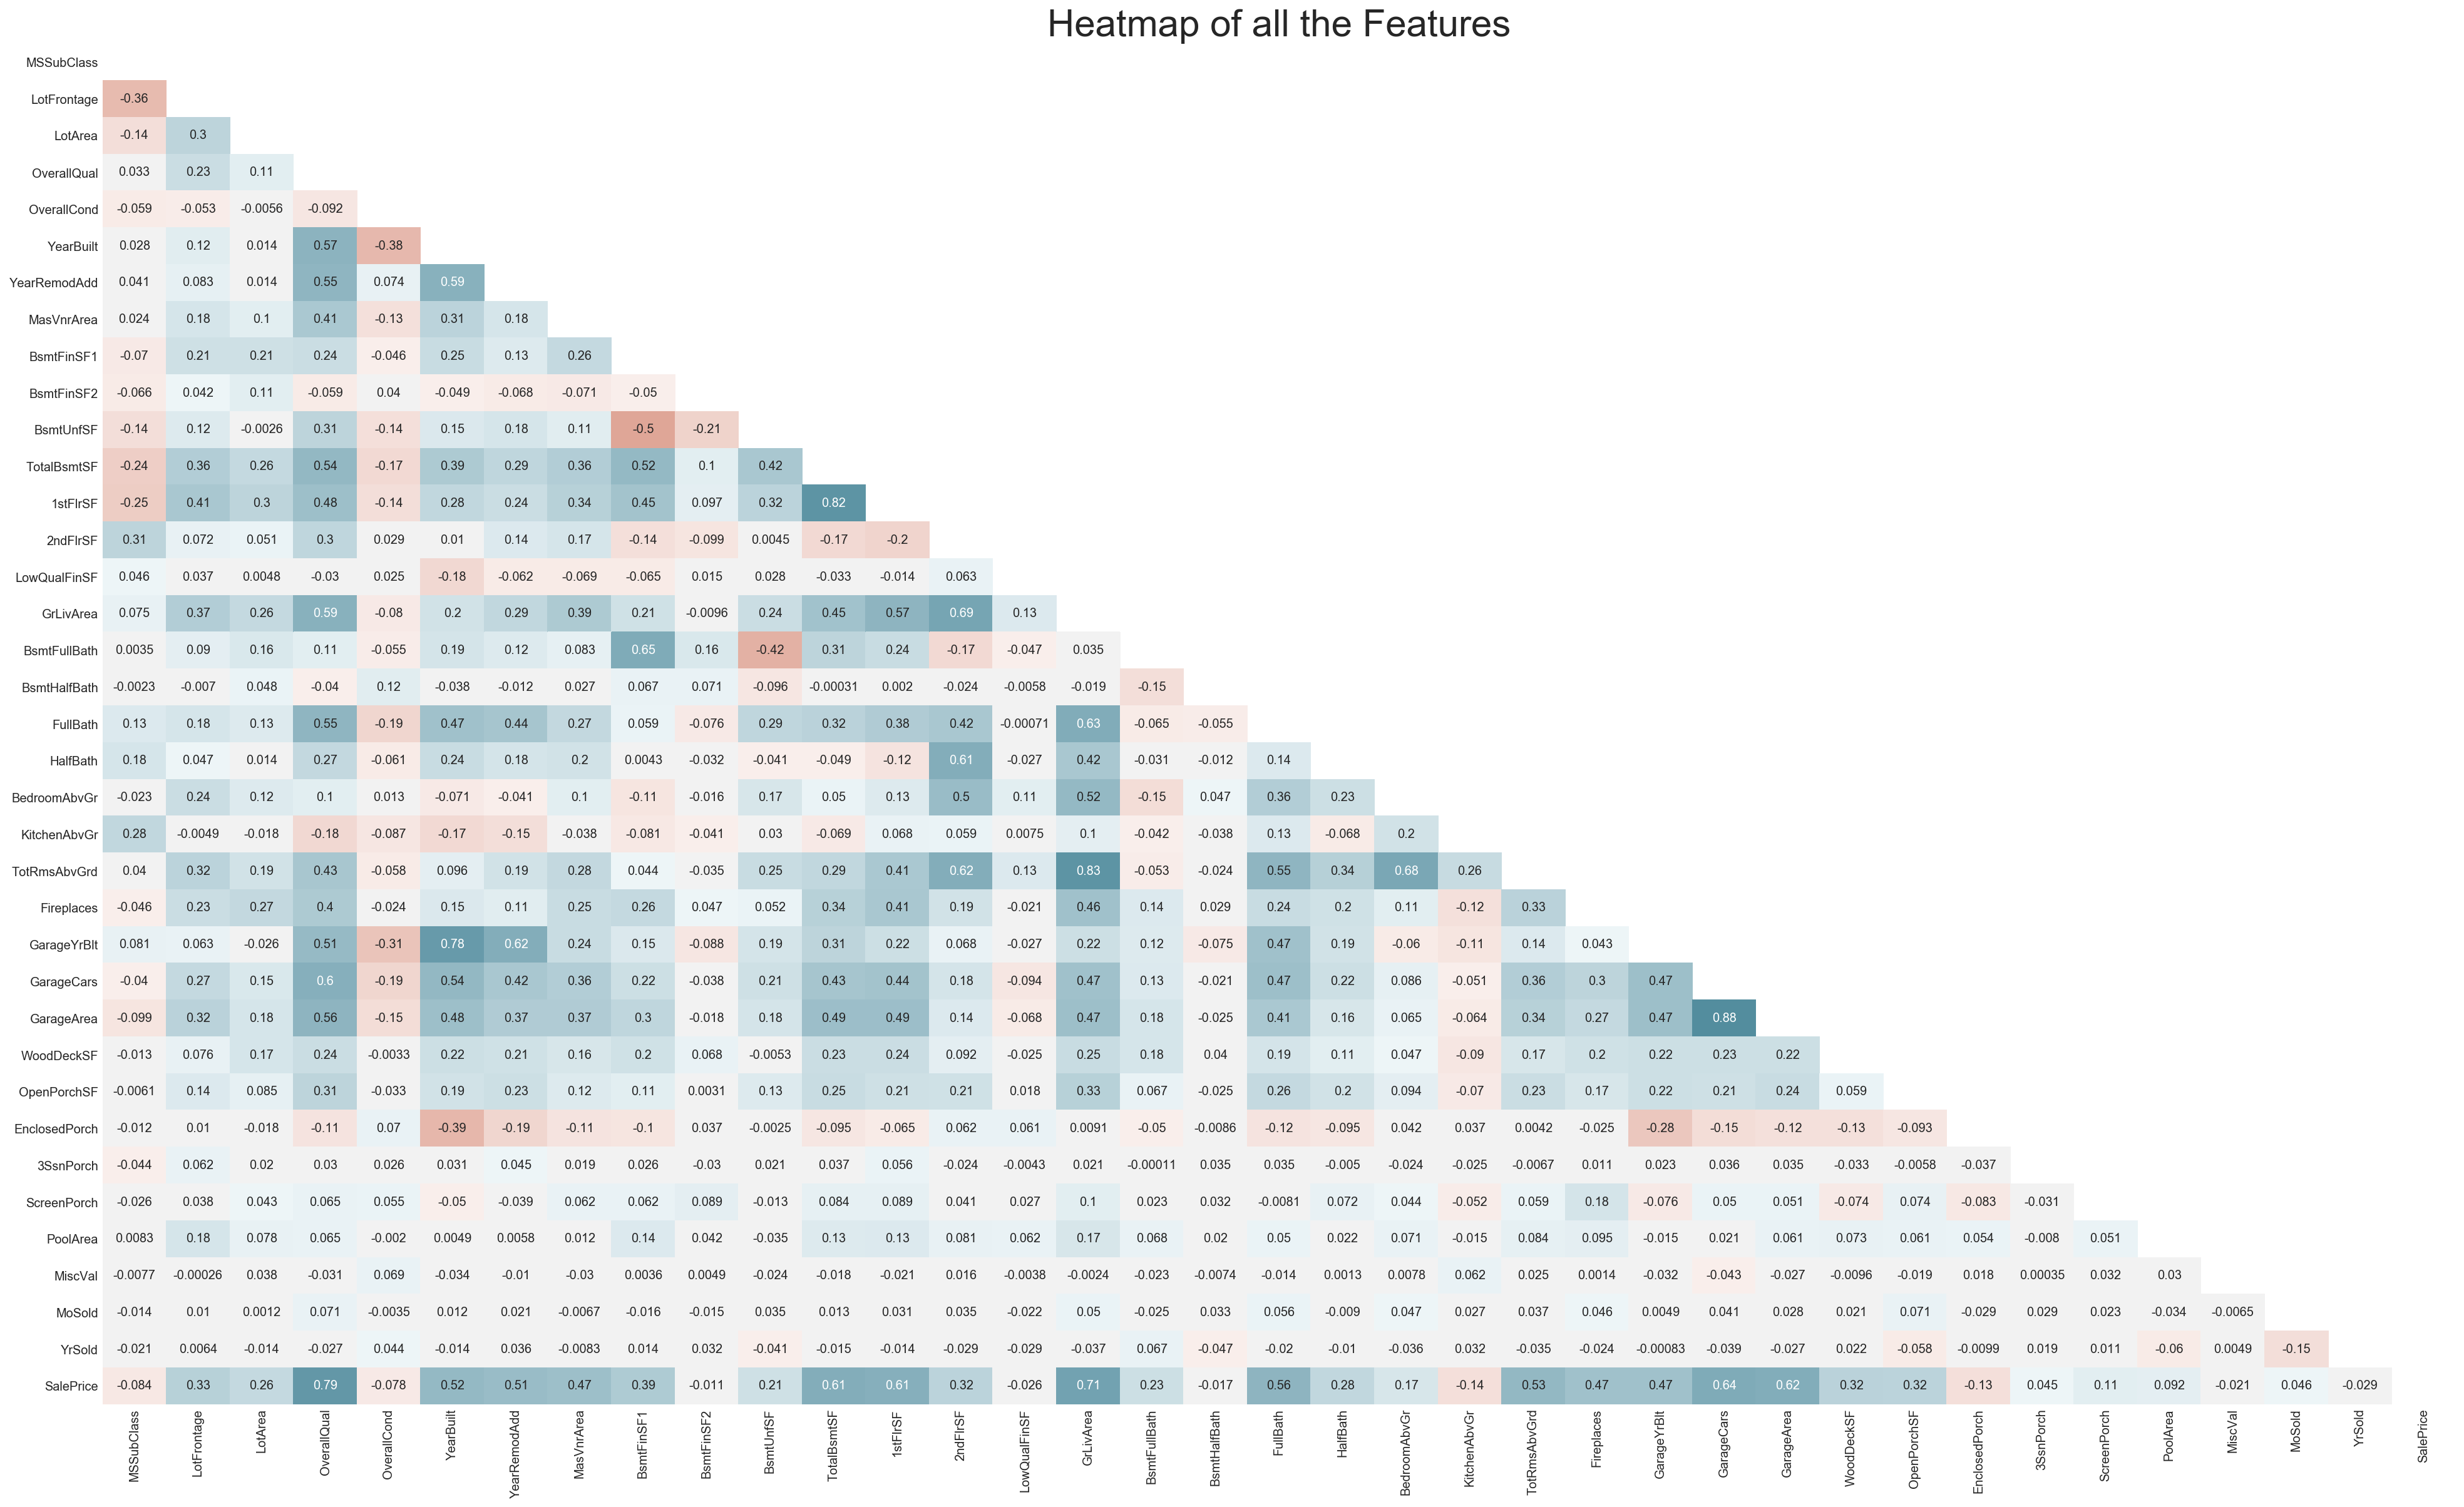

In [27]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(hp.drop(columns=['Id']).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(hp.drop(columns=['Id']).corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, cbar=False);
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

<div class="alert alert-block alert-info">
   
   - The highest correlation is **0.88** between the **GarageCars** and  **GarageArea**.
   - There is also high correlation between the **TotRmsAbvGrd** and **GrLivArea**, **0.83**.
   - For the Target variable (SalePrice), some of the features has high correlation with the target while other has low correlation. below is a list of all the values of the correlations for the target sorted from highest to lowest

In [28]:
feat_corr = abs(hp.corr().SalePrice).sort_values(ascending=False)[1:]
feat_corr

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

## Let's now detect and deal with outliers
- We'll be using the Tukey's method to detect the outliers.<br>
Link: __[Tukey's Fence](http://http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata7.html)__

In [29]:
def outliers_nan(df):
    dff = df.drop(columns=['Id','SalePrice'])
    for col in dff.columns:
        if dff[col].dtypes != 'O':
            IQR = np.percentile(dff[col],75) - np.percentile(dff[col],25)
            upper_limit = np.percentile(dff[[col]],75)+(3*IQR)
            lower_limit = np.percentile(dff[[col]],25)-(3*IQR)
            df[col] = dff[col].apply(lambda x: np.nan if x > upper_limit or x < lower_limit else x) 


In [30]:
outliers_nan(hp)

In [31]:
hp.isnull().sum().sort_values()

Id                 0
BsmtFinType1       0
BsmtFinType2       0
BsmtUnfSF          0
Heating            0
SaleCondition      0
CentralAir         0
Electrical         0
2ndFlrSF           0
BsmtFullBath       0
FullBath           0
HalfBath           0
KitchenQual        0
Functional         0
BsmtExposure       0
Fireplaces         0
GarageType         0
GarageYrBlt        0
GarageFinish       0
GarageCars         0
GarageQual         0
GarageCond         0
PavedDrive         0
PoolQC             0
Fence              0
MiscFeature        0
MoSold             0
YrSold             0
SaleType           0
FireplaceQu        0
BsmtCond           0
HeatingQC          0
Foundation         0
HouseStyle         0
BsmtQual           0
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
OverallQual        0
LotConfig          0
LandContour        0
LotShape           0
Alley              0
Street             0
MSZoning           0
MSSubClass         0
Utilities    

<div class="alert alert-block alert-warning">
    
   ### Outliers, were assigned a NaN value and it will be dealt with later on. 

## Combining the two datasets together to generate dummies.

In [32]:
hp_combined = pd.concat([hp,hp_test],join='inner')

In [33]:
y = hp.SalePrice

In [34]:
hp_combined = hp_combined[hp.columns[:-1]]

In [35]:
hp_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5.0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854,0.0,1710.0,1.0,0.0,2,1,3.0,1.0,Gd,8.0,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,2,2008,WD,Normal
1,2,20,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8.0,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0,0.0,1262.0,0.0,NaN,2,0,3.0,1.0,TA,6.0,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,5,2007,WD,Normal
2,3,60,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5.0,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866,0.0,1786.0,1.0,0.0,2,1,3.0,1.0,Gd,6.0,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,9,2008,WD,Normal
3,4,70,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5.0,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756,0.0,1717.0,1.0,0.0,1,0,3.0,1.0,Gd,7.0,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,NaN,0.0,0.0,0.0,NA,NA,NA,0.0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5.0,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053,0.0,2198.0,1.0,0.0,2,1,4.0,1.0,Gd,9.0,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,12,2008,WD,Normal


In [36]:
hp_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2903 non-null float64
LotArea          2885 non-null float64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2918 non-null float64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919

In [37]:
hp_combined_dum = pd.get_dummies(hp_combined, drop_first=True)
hp_combined_dum.shape

(2919, 260)

In [38]:
X_train = hp_combined_dum.iloc[0:hp.shape[0],:]
X_test =  hp_combined_dum.iloc[hp.shape[0]:,:]
y= hp.SalePrice
X_train['SalePrice']=y

<div class="alert alert-block alert-warning">
    
   ### We'll be removing any column that has no significant correlation with the target variable (SalePrice). 

In [39]:
L = []
for col in X_train.columns:
    try:
        if (abs(X_trian.corr().SalePrice[col])>0.5):
            L.append(col)
    except:
        L.append(col)
        
        
L.remove('Id')
c=L

In [40]:
X_train = X_train[L].dropna()
L.remove('SalePrice')

In [41]:
X_test = X_test[L]
y = X_train[['SalePrice']]
X_train.drop(columns='SalePrice', inplace=True)

In [42]:
X_train.shape,X_test.shape,y.shape

((815, 259), (1459, 259), (815, 1))

In [43]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [44]:
# y = np.log1p(y)

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train_ss,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
cross_val_score(lr_model,X_train_ss,y).mean()

-3.938431563082477e+21

# Lasso 

In [47]:
ls_model = Lasso(alpha=5)
cross_val_score(ls_model.fit(X_train_ss,y),X_train_ss,y).mean()

0.8846733306423374

In [48]:
lscv_model = LassoCV()

In [49]:
cross_val_score(lscv_model.fit(X_train_ss,y),X_train_ss,y).mean()

0.9101783479689268

# Ridge

In [50]:
rg_model = Ridge(alpha=5)

In [51]:
cross_val_score(rg_model.fit(X_train_ss,y),X_train_ss,y).mean()

0.8949827319600594

In [52]:
rgcv_model = RidgeCV(alphas=np.arange(0.1,10,0.1))

In [54]:
cross_val_score(rgcv_model.fit(X_train_ss,y),X_train_ss,y).mean()

0.8986369482991373

# ElasticNet

In [55]:
encv_model = ElasticNetCV()

In [56]:
cross_val_score(encv_model.fit(X_train_ss,y),X_train_ss,y).mean()

0.29715019687185956

# Randomforest

In [57]:
rf_model = RandomForestRegressor(max_depth=15, random_state=101)

In [58]:
cross_val_score(rf_model.fit(X_train_ss,y),X_train_ss,y).mean()

0.8805762884558109

In [59]:
grrf = GridSearchCV(rf_model, param_grid={'n_estimators':np.arange(1,50,1),'max_depth':np.arange(1,50,1)},
                   n_jobs=-1,verbose=1)

In [60]:
# grrf.fit(X_train_ss,y)

In [61]:

# cross_val_score(grrf,X_train_ss,y,cv=5).mean()

# KNN

In [62]:
knn_model= KNeighborsRegressor(n_neighbors=5)

In [63]:
cross_val_score(knn_model.fit(X_train_ss,y),X_train_ss,y).mean()

0.7812430196818251

# SVM

In [64]:
from sklearn.svm import SVR

In [65]:
svm_model=SVR()

In [66]:
cross_val_score(svm_model.fit(X_train_ss,y),X_train_ss,y).mean()

-0.022347006673893333

In [67]:
submit = pd.DataFrame(columns=['Id','SalePrice'])

In [70]:
submit.Id = hp_test.Id
submit.SalePrice =( rgcv_model.predict(X_test_ss))
submit.head()

,Id,SalePrice
0,1461,128423.654289
1,1462,181974.392463
2,1463,195029.668643
3,1464,208346.385829
4,1465,212691.491186


In [71]:
submit.to_csv('.\submission_rgcv_Final_t.csv',index=False)

# Conclusion & Recommendations.

<div class="alert alert-block alert-success">

- The best model is the LassoCV model, it scored 0.9101783479689268 on a cross validation. This result satisfys the original objective in the problem statments, since it is more than 0.9 accuracy score on cross validation scores mean.
- LassoCV was able to score the best, because it was able to eleminate un-important features from the models.
- Removing the outliers has positivly impaced the scores of the models. 
- Doing the grid search enhanced the results of the Random forest and the SVM Regressors. However, the score for the LassoCV is still better. This is essentially because in LassoCV there is a built in optimizer for the alpha value (kind of grid search).
- It's recommended to blend the results of more than one model together to improve the accuracy.